In [50]:
using  OrdinaryDiffEq, LinearAlgebra, LaTeXStrings, ForwardDiff, Plots, NBInclude, DifferentialEquations; gr()
@nbinclude("IntegratorTools.ipynb");

In [2]:
function Pendulum(u₀,h,N)
function f!(du,u,params,t)
     - sin(u) # u'' = -sin(u)
end

p0 = u₀[2];
q0 = u₀[1];
        
tspan = (0.0,h*N)
prob = SecondOrderODEProblem(f!,p0,q0,tspan)
sol = solve(prob,KahanLi8(), dt=1//100)

return stack(sol, dims=2)[end:-1:1,:]

end

Pendulum (generic function with 1 method)

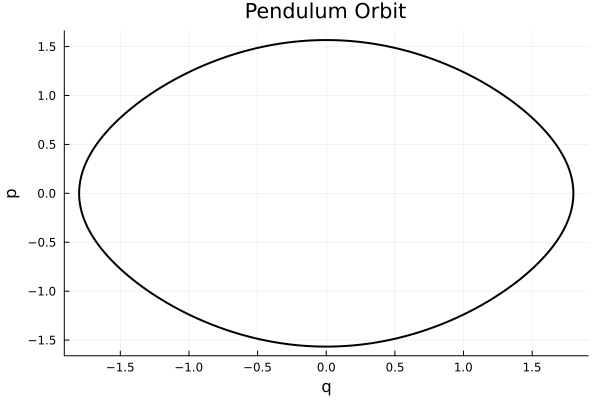

In [10]:
h = 1//100; N=1000; u0 = [1.8;0.0];    
uExact = Pendulum(u0,h,N)    
plot(uExact[1,:],uExact[2,:],xlabel = "q", ylabel = "p",lw=2,lc=:black,title = "Pendulum Orbit",legend = false)

In [4]:
function  fPendulum(y)
Ydot = [y[2], -sin(y[1])];
  return Ydot
end

function fPendulumT(p)
    
return Qdot = [p[1]];

end

function fPendulumV(q)
     
return Pdot = [- sin(q[1])];
    
end

fPendulumV (generic function with 1 method)

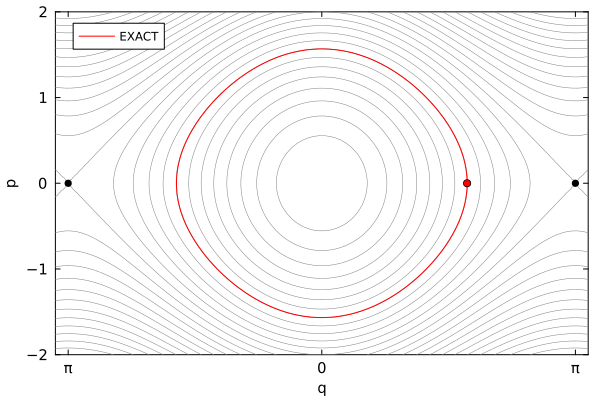

In [11]:
function plot_phase_portrait(uExact)  
V(x,y) = 0.5*y^2 - cos(x)
x = range(-3.3,3.3,100)
y = range(-2,2,100)
contour(x,y, (x,y)->V(x,y),color=[:gray] ,levels=25, lw=0.5,grid=:false,widen=false,colorbar_entry=false,framestyle = :box,)
plot!(uExact[1,:],uExact[2,:],lc=:red,lw=1,label="EXACT")
xticks!([-π,0,π], ["π","0", "π"])
xlabel!("q")
ylabel!("p")
plot!(xtickfontsize=10,ytickfontsize=10,xguidefontsize=10,yguidefontsize=10)
scatter!([-π], [0], color = "black",label="", markersize = 4)
scatter!([π], [0], color = "black",label="",  markersize = 4)
scatter!([1.8], [0], color = "red", label = "", markersize = 4)
end

plot_phase_portrait(uExact)  

In [123]:
function DiskArea(u0,h,N;flag=0)
    
t=0:0.01:2*pi; n = length(t);

area = zeros(2,n);

Y= circle.(t; center=u0, r=0.5)

Y = stack(Y, dims=1);

q0 = Y[:,1]; p0 = Y[:,2];

if flag==0
     for i=1:n
            y0 = [q0[i] , p0[i]];
         area[:,i]  = Pendulum(y0,h,N)[:,end]       
     end   
      
elseif flag==1
        
    for i=1:n
      y0 = [q0[i] , p0[i]];
      area[:,i]  = ExpEuler(fPendulum,y0,h,N)[:,end]
    end 
        
elseif flag==2
        
        for i=1:n
           y0 = [q0[i] , p0[i]];
          area[:,i]  = ImpEuler(fPendulum,y0,h,N)[:,end]             
       end 

elseif flag==3
        
        for i=1:n
           y0 = [q0[i] , p0[i]];
          area[:,i]  = SympEuler(fPendulumT,fPendulumV,[y0[1]],[y0[2]],h,N)[:,end]             
       end 

elseif flag==4
        
        for i=1:n
           y0 = [q0[i] , p0[i]];
          area[:,i]  = MidPoint(fPendulum,y0,h,N)[:,end]             
       end 

        
elseif flag==5
        
        for i=1:n
           y0 = [q0[i] , p0[i]];
          area[:,i]  = RK4(fPendulum,y0,h,N)[:,end]             
       end         

elseif flag==6
        
        for i=1:n
           y0 = [q0[i] , p0[i]];
          area[:,i]  = StormerVerlet(fPendulumT,fPendulumV,[y0[1]],[y0[2]],h,N)[:,end]             
       end         

elseif flag==7
A,b = RKdata(3); # Symplectic RK method  of odrer 4        
        for i=1:n
           y0 = [q0[i] , p0[i]];
          area[:,i]  = ImpRK(fPendulum,y0,A,b,h,N)[:,end]             
       end      

elseif flag==8
        for i=1:n
           y0 = [q0[i] , p0[i]];
          area[:,i]  = Runge(fPendulum,y0,h,N)[:,end]        
       end      
end
    
return  area;
end



function plot_area(method, h, n_iter)
V(x,y) = 0.5*y^2 - cos(x)
x = range(-5,5,100)
y = range(-3,3,100)
contour(x,y, (x,y)->V(x,y),color=[:gray] ,levels=35, lw=0.5,grid=:false,widen=false,legend=false,framestyle = :box)

for N in n_iter        
A = DiskArea(u0,h,N, flag = method)
B = DiskArea(u0,h,N)
plot!(B[1,:],B[2,:],fc=:white,lc=:black,fill=true,lw=1,fillalpha=1)        
plot!(A[1,:],A[2,:],fc=:gray,lc=:black,fill=true,lw=1,fillalpha=1)
end
xticks!([-π,0,π], ["-π","0", "π"])
#xlabel!("q")
#ylabel!("p")
#scatter!([-π], [0], color = "black", label = "", markersize = 5)
#scatter!([π], [0], color = "black", label = "", markersize = 5)
end

plot_area (generic function with 2 methods)

In [125]:
gr();



u0=[1.8,0];
h1 = π / 4 ; 
h2 = π / 3 ; 

n_iter2 = [0,1,2,3,4,5];

p1=plot_area(1,h1,n_iter2)
p2=plot_area(2,h1,n_iter2)
p3=plot_area(3,h1,n_iter2)

p4=plot_area(8,h2,n_iter2)
p5=plot_area(4,h2,n_iter2)
p6=plot_area(6,h2,n_iter2)

l = [grid(3,1) grid(3,1)]
plot(p1,p2,p3,p4,p5,p6;layout=l)

savefig("area_preserving.pdf")

"/home/khaled-hariz/area_preserving.pdf"